<a href="https://colab.research.google.com/github/KOO-96/NLP_Studying/blob/main/transformer_%EC%8B%9C%EC%97%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import pandas as pd

# xls_a = pd.read_excel('/content/drive/MyDrive/트랜스포머/data/data1.xlsx', index_col=None)
# xls_b = pd.read_excel('/content/drive/MyDrive/트랜스포머/data/data2.xlsx', index_col=None)

# xls_a.to_csv('/content/drive/MyDrive/트랜스포머/data/data1.csv', encoding='utf-8', index=False)
# xls_b.to_csv('/content/drive/MyDrive/트랜스포머/data/data2.csv', encoding='utf-8', index=False)

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/트랜스포머/data/data1.csv', encoding = 'utf-8', index_col=0)
data = data[:30000]
# data2 = pd.read_csv('/content/drive/MyDrive/트랜스포머/data/data2.csv', encoding = 'utf-8')

In [ ]:
display(data)

,원문,번역문
SID,,
1,'Bible Coloring'은 성경의 아름다운 이야기를 체험 할 수 있는 컬러링 ...,Bible Coloring' is a coloring application that...
2,씨티은행에서 일하세요?,Do you work at a City bank?
3,푸리토의 베스트셀러는 해외에서 입소문만으로 4차 완판을 기록하였다.,"PURITO's bestseller, which recorded 4th rough ..."
4,11장에서는 예수님이 이번엔 나사로를 무덤에서 불러내어 죽은 자 가운데서 살리셨습니다.,In Chapter 11 Jesus called Lazarus from the to...
5,"6.5, 7, 8 사이즈가 몇 개나 더 재입고 될지 제게 알려주시면 감사하겠습니다.",I would feel grateful to know how many stocks ...
...,...,...
29996,그는 충격받았는지 아무 표정이 없습니다.,He looks shocked and doesn't have any facial e...
29997,"그는 충분히 비난받았고, 이제 내가 비난받을 차례야.",He was thoroughly criticized and now is my turn.
29998,그는 충청북도 청주시 상당구 서문동에 살고 있다.,"He is living in Seomun-dong, Sangdang-gu, Cheo..."


In [ ]:
# kor / eng split

kor_text = []
eng_text = []

for _, row in data.iterrows():
  kor, eng = row
  kor_text.append(kor)
  eng_text.append(eng)

In [ ]:
for kor, eng in zip(kor_text[:5], eng_text[:5]):
  print(f"[KOR] : {kor}")
  print(f"[ENG] : {eng}")

[KOR] : 'Bible Coloring'은 성경의 아름다운 이야기를 체험 할 수 있는 컬러링 앱입니다.
[ENG] : Bible Coloring' is a coloring application that allows you to experience beautiful stories in the Bible.
[KOR] : 씨티은행에서 일하세요?
[ENG] : Do you work at a City bank?
[KOR] : 푸리토의 베스트셀러는 해외에서 입소문만으로 4차 완판을 기록하였다.
[ENG] : PURITO's bestseller, which recorded 4th rough -cuts by words of mouth from abroad.
[KOR] : 11장에서는 예수님이 이번엔 나사로를 무덤에서 불러내어 죽은 자 가운데서 살리셨습니다.
[ENG] : In Chapter 11 Jesus called Lazarus from the tomb and raised him from the dead.
[KOR] : 6.5, 7, 8 사이즈가 몇 개나 더 재입고 될지 제게 알려주시면 감사하겠습니다.
[ENG] : I would feel grateful to know how many stocks will be secured of size 6.5, 7, and 8.


In [ ]:
# kor torkenizer txt생성
with open('kor_train.txt', 'w', encoding = 'utf-8') as f:
  for line in kor_text:
    print(line, file = f)

# eng torkenizer txt생성
with open('eng_train.txt', 'w', encoding = 'utf-8') as f:
  for line in eng_text:
    print(line, file = f)

In [ ]:
# tokenizer parameter
params = {
    'batch_size': 64,
    'num_epoch': 5,
    'dropout': 0.1,
    'min_frequency': 2,
    'vocab_size': 10000,
    'num_layers': 6,
    'num_heads': 8,
    'hidden_dim': 512,
    'ffn_dim': 2048,
}

In [ ]:
from tokenizers import Tokenizer, models, trainers, pre_tokenizers, decoders

tokenizer_model = models.BPE()
kor_tokenizer = Tokenizer(tokenizer_model)

trainer = trainers.BpeTrainer(
    vocab_size = params['vocab_size'],
    min_frequency = params['min_frequency'],
    special_tokens = ['[PAD]', '[SOS]', '[EOS]', '[UNK]'],
    suffix = ''
)

kor_tokenizer.train(files = ['kor_train.txt'], trainer = trainer)

In [ ]:
from tokenizers import Tokenizer, models, trainers, pre_tokenizers, decoders

tokenizer_model = models.BPE()
eng_tokenizer = Tokenizer(tokenizer_model)

trainer = trainers.BpeTrainer(
    vocab_size = params['vocab_size'],
    min_frequency = params['min_frequency'],
    special_tokens = ['[PAD]', '[SOS]', '[EOS]', '[UNK]'],
    suffix = ''
)

eng_tokenizer.train(files = ['eng_train.txt'], trainer = trainer)

In [ ]:
pad_idx = kor_tokenizer.token_to_id('[PAD]')
sos_idx = kor_tokenizer.token_to_id('[SOS]')
eos_idx = kor_tokenizer.token_to_id('[EOS]')

In [ ]:
kor_encoded_data = kor_tokenizer.encode_batch(kor_text)
eng_encoded_data = eng_tokenizer.encode_batch(eng_text)

In [ ]:
for origin, processed in zip(kor_text[:3], kor_encoded_data[:3]):
  print(f"[ORIGIN] : {origin}")
  print(f"[PROCESSED] : {processed.tokens}\n")

[ORIGIN] : 'Bible Coloring'은 성경의 아름다운 이야기를 체험 할 수 있는 컬러링 앱입니다.
[PROCESSED] : ["'", 'B', 'ib', 'le ', 'C', 'ol', 'or', 'ing', "'은 ", '성', '경', '의 ', '아름다', '운', ' 이야기를 ', '체험', ' ', '할 수 있는 ', '컬러', '링 ', '앱', '입니다', '.']

[ORIGIN] : 씨티은행에서 일하세요?
[PROCESSED] : ['씨', '티', '은행', '에서 일', '하', '세', '요?']

[ORIGIN] : 푸리토의 베스트셀러는 해외에서 입소문만으로 4차 완판을 기록하였다.
[PROCESSED] : ['푸', '리', '토', '의 ', '베', '스트', '셀러', '는 ', '해외에서 ', '입', '소문', '만으로 ', '4차 ', '완', '판', '을 기', '록', '하였', '다', '.']



In [ ]:
for origin, processed in zip(eng_text[:3], eng_encoded_data[:3]):
  print(f"[ORIGIN] : {origin}")
  print(f"[PROCESSED] : {processed.tokens}\n")

[ORIGIN] : Bible Coloring' is a coloring application that allows you to experience beautiful stories in the Bible.
[PROCESSED] : ['B', 'ible ', 'Col', 'or', 'ing', "' ", 'is a ', 'color', 'ing ', 'applic', 'ation that ', 'allows ', 'you to ', 'experience ', 'beautiful ', 'stories ', 'in the ', 'B', 'i', 'ble', '.']

[ORIGIN] : Do you work at a City bank?
[PROCESSED] : ['Do ', 'you w', 'ork ', 'at a ', 'City ', 'bank', '?']

[ORIGIN] : PURITO's bestseller, which recorded 4th rough -cuts by words of mouth from abroad.
[PROCESSED] : ['P', 'UR', 'IT', 'O', "'s ", 'best', 'sell', 'er, ', 'which ', 'record', 'ed ', '4th ', 'rough ', '-', 'cut', 's by ', 'word', 's of ', 'mouth ', 'from ', 'ab', 'road', '.']



In [ ]:
# 후처리

kor_len_max = max(len(line.tokens) for line in kor_encoded_data)
eng_len_max = max(len(line.tokens) for line in eng_encoded_data)
kor_len, eng_len = 0, 0

for line in kor_encoded_data:
  kor_len += len(line.tokens)
kor_len_avg = kor_len / len(kor_encoded_data)

print(kor_len_avg, kor_len_max)

13.249866666666666 51


In [ ]:
for line in eng_encoded_data:
  eng_len += len(line.tokens)
eng_len_avg = eng_len / len(eng_encoded_data)

print(eng_len_avg, eng_len_max)

12.646066666666666 59


In [ ]:
params['max_len'] = 60

In [ ]:
def pad_sentence(input_ids):
  num_pad = params['max_len'] - len(input_ids)
  input_ids.extend([pad_idx] * num_pad)
  return input_ids

In [ ]:
def postprocess(input_ids):
    '''입력 문장에 [SOS] 토큰과 [EOS] 토큰 부여'''

    input_ids = pad_sentence(input_ids)

    input_ids = [sos_idx] + input_ids

    input_ids = input_ids[:params['max_len']]

    if pad_idx in input_ids:
        pad_start = input_ids.index(pad_idx)
        input_ids[pad_start] = eos_idx
    else:
        input_ids[-1] = eos_idx

    return input_ids

In [ ]:
sent = '우리 진짜 별나대 그냥 내가 너무 좋아해 넌 그걸 너무 잘 알고 날 쥐락펴락해 나도 마찬가지인걸'

proc_sent = kor_tokenizer.encode(sent)
print(f'토큰화 결과: {proc_sent.tokens}')

토큰화 결과: ['우리 ', '진짜 ', '별', '나', '대 ', '그냥 내가 ', '너무 ', '좋아', '해 ', '넌', ' 그', '걸 ', '너무 ', '잘 ', '알고 ', '날 ', '쥐', '락', '펴', '락', '해 ', '나도 ', '마찬', '가지', '인', '걸']


In [ ]:
post_proc_sent = postprocess(proc_sent.ids)

print(f'후처리 결과: {post_proc_sent}\n')
print(f'후처리 해석: {kor_tokenizer.decode(post_proc_sent)}')

후처리 결과: [1, 1900, 5182, 734, 293, 1932, 7503, 1774, 1697, 1596, 323, 2140, 2040, 1774, 1689, 5453, 1980, 1152, 529, 2]

후처리 해석: 우리  진짜  별 나 대  그냥 내가  너무  좋아 해  넌  그 걸  너무  잘  알고  날  쥐 락


In [ ]:
kor_processed_data = [postprocess(data.ids) for data in kor_encoded_data]
eng_processed_data = [postprocess(data.ids) for data in eng_encoded_data]

In [ ]:
import torch
from torch.utils.data import DataLoader

torch.backends.cudnn.deterministic = True

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

kor_tensors = [torch.LongTensor(line).to(device) for line in kor_processed_data]
eng_tensors = [torch.LongTensor(line).to(device) for line in eng_processed_data]

src_iter = DataLoader(kor_tensors, batch_size=params['batch_size'])
tgt_iter = DataLoader(eng_tensors, batch_size=params['batch_size'])

In [ ]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(32)
torch.cuda.manual_seed(32)
torch.backends.cudnn.deterministic = True

In [ ]:
class MultiHeadAttention(nn.Module):
    '''멀티 헤드 어텐션 레이어'''
    def __init__(self, params):
        super(MultiHeadAttention, self).__init__()
        assert params['hidden_dim'] % params['num_heads'] == 0,
        self.num_heads = params['num_heads']
        self.attn_dim = params['hidden_dim'] // self.num_heads

        self.q_w = nn.Linear(params['hidden_dim'], self.num_heads * self.attn_dim)
        self.k_w = nn.Linear(params['hidden_dim'], self.num_heads * self.attn_dim)
        self.v_w = nn.Linear(params['hidden_dim'], self.num_heads * self.attn_dim)

        self.o_w = nn.Linear(self.num_heads * self.attn_dim, params['hidden_dim'])

    def forward(self, q, k, v, mask=None):
        " q, k, v = [배치 사이즈, 문장 길이, 은닉 차원] "

        batch_size = q.size(0)

        q = self.q_w(q).view(batch_size, -1, self.num_heads, self.attn_dim).transpose(1, 2)
        k = self.k_w(k).view(batch_size, -1, self.num_heads, self.attn_dim).transpose(1, 2)
        v = self.v_w(v).view(batch_size, -1, self.num_heads, self.attn_dim).transpose(1, 2)
        # q, k, v = [배치 사이즈, 헤드 갯수, 문장 길이, 어텐션 차원]

        attn = torch.matmul(q, k.transpose(-1, -2))
        # attn = [배치 사이즈, 헤드 갯수, 문장 길이, 문장 길이]

        if mask is not None:
            mask = mask.unsqueeze(1)
            attn.masked_fill(mask==0, -1e9)

        score = F.softmax(attn, dim=-1)
        # score = [배치 사이즈, 헤드 갯수, 문장 길이, 문장 길이]

        output = torch.matmul(score, v)
        # output = [배치 사이즈, 헤드 갯수, 문장 길이, 어텐션 차원]

        output = output.transpose(1, 2).contiguous()
        # output = [배치 사이즈, 문장 길이, 헤드 갯수, 어텐션 차원]

        output = output.view(batch_size, -1, self.num_heads * self.attn_dim)
        # output = [배치 사이즈, 문장 길이, 은닉 차원]

        output = self.o_w(output)
        # output = [배치 사이즈, 문장 길이, 은닉 차원]

        return output, score

In [ ]:
def create_subsequent_mask(tgt):
    batch_size, tgt_len = tgt.size()

    subsequent_mask = torch.triu(torch.ones(tgt_len, tgt_len), diagonal=1).bool()
    # subsequent_mask = [타겟 문장 길이, 타겟 문장 길이]

    subsequent_mask = subsequent_mask.unsqueeze(0).repeat(batch_size, 1, 1).to(device)
    # subsquent_mask = [배치 사이즈, 타겟 문장 길이, 타겟 문장 길이]

    return subsequent_mask

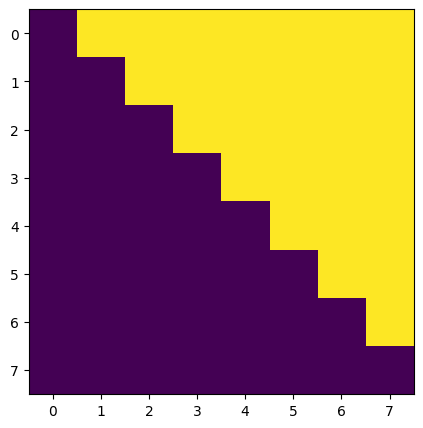

In [ ]:
test_sent = '평온했던 하늘이 무너지고,'
test_tensor = kor_tokenizer.encode(test_sent)
test_tensor = torch.LongTensor(test_tensor.ids).to(device).unsqueeze(0)

plt.figure(figsize=(5,5))
plt.imshow(create_subsequent_mask(test_tensor).cpu()[0])

In [ ]:
def create_src_mask(src):
    " source = [배치 사이즈, 소스 문장 길이] "

    src_len = src.size(1)

    src_mask = (src == pad_idx)
    # src_mask = [배치 사이즈, 소스 문장 길이]

    src_mask = src_mask.unsqueeze(1).repeat(1, src_len, 1)
    # src_mask = [배치 사이즈, 소스 문장 길이, 소스 문장 길이]

    return src_mask.to(device)


def create_tgt_mask(src, tgt):
    " src = [배치 사이즈, 소스 문장 길이] "
    " tgt = [배치 사이즈, 타겟 문장 길이] "

    batch_size, tgt_len = tgt.size()

    subsequent_mask = create_subsequent_mask(tgt)

    enc_dec_mask = (src == pad_idx)
    tgt_mask = (tgt == pad_idx)
    # src_mask = [배치 사이즈, 소스 문장 길이]
    # tgt_mask = [배치 사이즈, 타겟 문장 길이]

    enc_dec_mask = enc_dec_mask.unsqueeze(1).repeat(1, tgt_len, 1).to(device)
    tgt_mask = tgt_mask.unsqueeze(1).repeat(1, tgt_len, 1).to(device)
    # src_mask = [배치 사이즈, 타겟 문장 길이, 소스 문장 길이]
    # tgt_mask = [배치 사이즈, 타겟 문장 길이, 타겟 문장 길이]

    tgt_mask = tgt_mask | subsequent_mask

    return enc_dec_mask, tgt_mask

In [ ]:
## 5-2. Position-wise Feed-Forward 네트워크 구현
class PositionwiseFeedForward(nn.Module):
    '''포지션 와이즈 피드 포워드 레이어'''
    def __init__(self, parmas):
        super(PositionwiseFeedForward, self).__init__()
        self.fc1 = nn.Linear(params['hidden_dim'], params['ffn_dim'])
        self.fc2 = nn.Linear(params['ffn_dim'], params['hidden_dim'])
        self.dropout = nn.Dropout(params['dropout'])

    def forward(self, x):
        " x = [배치 사이즈, 문장 길이, 은닉 차원] "

        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

In [ ]:
class PositionalEncoding(nn.Module):
    def __init__(self, params):
        super(PositionalEncoding, self).__init__()
        sinusoid = np.array([pos / np.power(10000, 2 * i / params['hidden_dim'])
                            for pos in range(params['max_len']) for i in range(params['hidden_dim'])])
        # sinusoid = [문장 최대 길이 * 은닉 차원]

        sinusoid = sinusoid.reshape(params['max_len'], -1)
        # sinusoid = [문장 최대 길이, 은닉 차원]

        sinusoid[:, 0::2] = np.sin(sinusoid[:, 0::2])
        sinusoid[:, 1::2] = np.cos(sinusoid[:, 1::2])
        sinusoid = torch.FloatTensor(sinusoid).to(device)

        self.embedding = nn.Embedding.from_pretrained(sinusoid, freeze=True)

    def forward(self, x):
        " x = [배치 사이즈, 문장 길이] "

        pos = torch.arange(x.size(-1), dtype=torch.long).to(device)
        # pos = [배치 사이즈, 문장 길이]

        embed = self.embedding(pos)
        # embed = [배치 사이즈, 문장 길이, 은닉 차원]
        return embed

In [ ]:
class EncoderLayer(nn.Module):
    '''인코더 레이어'''
    def __init__(self, params):
        super(EncoderLayer, self).__init__()
        self.self_attn = MultiHeadAttention(params)
        self.layer_norm1 = nn.LayerNorm(params['hidden_dim'])
        self.feed_forward = PositionwiseFeedForward(params)
        self.layer_norm2 = nn.LayerNorm(params['hidden_dim'])
        self.dropout = nn.Dropout(params['dropout'])

    def forward(self, x, src_mask):
        " x = [배치 사이즈, 문장 길이, 은닉 차원] "

        residual = x
        x, _ = self.self_attn(x, x, x, src_mask)
        x = self.dropout(x)
        x = residual + x
        x = self.layer_norm1(x)

        residual = x
        x = self.feed_forward(x)
        x = self.dropout(x)
        x = residual + x
        x = self.layer_norm2(x)

        return x


class Encoder(nn.Module):
    def __init__(self, params):
        super(Encoder, self).__init__()
        self.tok_embedding = nn.Embedding(params['vocab_size'], params['hidden_dim'], padding_idx=pad_idx)
        self.pos_embedding = PositionalEncoding(params)
        self.layers = nn.ModuleList([EncoderLayer(params) for _ in range(params['num_layers'])])

    def forward(self, src):
        " src = [배치 사이즈, 소스 문장 길이] "

        src_mask = create_src_mask(src)
        src = self.tok_embedding(src) + self.pos_embedding(src)

        for layer in self.layers:
            src = layer(src, src_mask)

        # src = [배치 사이즈, 소스 문장 길이, 은닉 차원]
        return src

In [ ]:
class DecoderLayer(nn.Module):
    '''디코더 레이어'''
    def __init__(self, params):
        super(DecoderLayer, self).__init__()
        self.self_attn = MultiHeadAttention(params)
        self.layer_norm1 = nn.LayerNorm(params['hidden_dim'])

        self.enc_dec_attn = MultiHeadAttention(params)
        self.layer_norm2 = nn.LayerNorm(params['hidden_dim'])

        self.feed_forward = PositionwiseFeedForward(params)
        self.layer_norm3 = nn.LayerNorm(params['hidden_dim'])

        self.dropout = nn.Dropout(params['dropout'])

    def forward(self, x, tgt_mask, enc_output, src_mask):
        " x = [배치 사이즈, 문장 길이, 은닉 차원] "

        residual = x
        x, _ = self.self_attn(x, x, x, tgt_mask)
        x = self.dropout(x)
        x = residual + x
        x = self.layer_norm1(x)

        residual = x
        x, attn_map = self.enc_dec_attn(x, enc_output, enc_output, src_mask)
        x = self.dropout(x)
        x = residual + x
        x = self.layer_norm2(x)

        residual = x
        x = self.feed_forward(x)
        x = self.dropout(x)
        x = residual + x
        x = self.layer_norm3(x)

        return x, attn_map


class Decoder(nn.Module):
    def __init__(self, params):
        super(Decoder, self).__init__()
        self.tok_embedding = nn.Embedding(params['vocab_size'], params['hidden_dim'], padding_idx=pad_idx)
        self.pos_embedding = PositionalEncoding(params)
        self.layers = nn.ModuleList([DecoderLayer(params) for _ in range(params['num_layers'])])

    def forward(self, tgt, src, enc_out):
        " tgt = [배치 사이즈, 타겟 문장 길이] "

        src_mask, tgt_mask = create_tgt_mask(src, tgt)
        tgt = self.tok_embedding(tgt) + self.pos_embedding(tgt)

        for layer in self.layers:
            tgt, attn_map = layer(tgt, tgt_mask, enc_out, src_mask)

        tgt = torch.matmul(tgt, self.tok_embedding.weight.transpose(0, 1))
        # tgt = [배치 사이즈, 타겟 문장 길이, 은닉 차원]

        return tgt, attn_map

In [ ]:
class Transformer(nn.Module):
    '''트랜스포머 네트워크'''
    def __init__(self, params):
        super(Transformer, self).__init__()
        self.encoder = Encoder(params)
        self.decoder = Decoder(params)

    def forward(self, src, tgt):
        " src = [배치 사이즈, 소스 문장 길이] "
        " tgt = [배치 사이즈, 타겟 문장 길이] "

        enc_out = self.encoder(src)
        dec_out, attn = self.decoder(tgt, src, enc_out)
        return dec_out, attn

    def count_params(self):
        return sum(p.numel() for p in self.parameters() if p.requires_grad)

In [ ]:
class ScheduledOptim:
    '''스케줄 옵티마이저'''
    def __init__(self, optimizer, warmup_steps):
        self.init_lr = np.power(params['hidden_dim'], -0.5)
        self.optimizer = optimizer
        self.step_num = 0
        self.warmup_steps = warmup_steps

    def step(self):
        self.step_num += 1
        lr = self.init_lr * self.get_scale()

        for p in self.optimizer.param_groups:
            p['lr'] = lr

        self.optimizer.step()

    def zero_grad(self):
        self.optimizer.zero_grad()

    def get_scale(self):
        return np.min([
            np.power(self.step_num, -0.5),
            self.step_num * np.power(self.warmup_steps, -1.5)
        ])

In [ ]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import numpy as np
import matplotlib as plt

torch.manual_seed(32)
torch.cuda.manual_seed(32)
torch.backends.cudnn.deterministic = True

In [ ]:
model = Transformer(params)

model.to(device)
print(f'The model has {model.count_params():,} trainable parameters')

criterion = nn.CrossEntropyLoss(ignore_index=pad_idx)
criterion.to(device)

optimizer = ScheduledOptim(
    optim.Adam(model.parameters(), betas = (0.9, 0.98), eps = 1e-9),
    warmup_steps = 2000
)

The model has 54,378,496 trainable parameters


In [ ]:
from tqdm import tqdm
import time

start_tic = time.time()

for epoch in tqdm(range(params['num_epoch']), desc="epoch"):
  model.train()
  epoch_loss = 0

  tic = time.time()
  for src, tgt in tqdm(zip(src_iter, tgt_iter), total = len(src_iter), desc = "training", leave = False, mininterval = 10):
    optimizer.zero_grad()

    logits, _ = model(src, tgt[:, :-1])

    logits = logits.contiguous().view(-1, logits.size(-1))
    golds = tgt[:, 1:].contiguous().view(-1)

    loss = criterion(logits, golds)
    epoch_loss += loss.item()

    loss.backward()
    optimizer.step()

  train_loss = epoch_loss / len(src_iter)
  toc = time.time()

  print(f'Epochs : {epoch+1:02} | Train Loss : {train_loss:.3f} | Time : {toc - tic}')
  tic = time.time()

  torch.save(model.state_dict(), f'./epoch_{epoch}.pth')
  toc = time.time()
  print(f'epoch_{epoch}.pth 저장까지 걸린 시간 = {toc - tic}만큼 걸렸습니다.')

end_tic = time.time()
print(f'총 걸린 시간 = {end_tic - start_tic}만큼 걸렸습니다.')

training:  15%|█▌        | 71/469 [21:22<1:36:08, 14.49s/it]

In [ ]:
device = 'cpu'
model.to(device)

model.eval()

sent = "금융"
proc_sent = kor_tokenizer.encode(sent)
post_proc_sent = postprocess(proc_sent.ids)

input_tensor = torch.LongTensor(post_proc_sent).to(device)
input_tensor = input_tensor.unsqueeze(0)

output_tensor = torch.LongTensor([1]).to(device).unsqueeze(0)

with torch.no_grad():
  for _ in range(10):
    logits, _ = model(input_tensor, output_tensor)
    next_token = logits.argmax(-1)[:, -1]
    output_tensor = torch.cat([output_tensor, next_token.unsqueeze(-1)], dim = -1)

    if next_token.item() == 2:
      break

decoded_output = eng_tokenizer.decode(output_tensor.squeeze().tolist())
print(decoded_output)

with torch.no_grad():
  for _ in range(10):
    logits, _ = model(input_tensor, output_tensor)
    print("Logits : ", logits)
    print("Argmax : ", logits.argmax(-1))

    next_token = logits.argmax(-1)[:, -1]
    output_tensor = torch.cat([output_tensor, next_token.unsqueeze(0)], dim = -1)

    print("Output_Tensor : ", output_tensor)

    if next_token.item() == 2:
      break

print("Decoding Output Tensor : ", output_tensor.squeeze().tolist())
decoded_output = eng_tokenizer.decode(output_tensor.squeeze().tolist())
print(decoded_output)

In [ ]:
import torch

device = 'cpu'
model.to(device)

model.eval()
sent = "입력 값"

proc_sent = kor_tokenizer.encode(sent)
post_proc_sent = postprocess(proc_sent.ids)

input_tensor = torch.LongTensor(post_proc_sent).to(device)
input_tensor = input_tensor.unsqueeze(0)  # 배치 차원 추가

output_tensor = torch.LongTensor([1]).to(device).unsqueeze(0)


with torch.no_grad():
    for _ in range(10):
        logits, _ = model(input_tensor, output_tensor)
        next_token = logits.argmax(-1)[:, -1]
        output_tensor = torch.cat([output_tensor, next_token.unsqueeze(-1)], dim=-1)

        if next_token.item() == 2:
            break

# 번역된 토큰들을 디코딩
decoded_output = eng_tokenizer.decode(output_tensor.squeeze().tolist())
print("번역 결과:", decoded_output)


In [ ]:
# 출력 토큰이 어떤 의미인지 확인합니다
print("Token ID  corresponds to:", eng_tokenizer.decode([2474]))
